<a href="https://colab.research.google.com/github/manojnahak02/Ridge-and-Lasso-Regression-implementation/blob/master/Ridge_and_Lasso_Regression_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Load_boston is data were price of house will be predicted based on varous features
from sklearn.datasets import load_boston

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = load_boston()

In [0]:
df

In [0]:
#Converting the data into a Data Frame
dataset = pd.DataFrame(df.data)
print(dataset.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [0]:
#Assigning columns names
dataset.columns=df.feature_names

In [0]:
dataset.head() #dataset without Y

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
#dependent feature
df.target.shape

(506,)

In [0]:
#new column 'Price' is created to store the Y variable data
dataset['PRICE']=df.target

In [0]:
dataset.head() #dataset with Y

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#dividing dataset into depndent and independent feature
x=dataset.iloc[:,:-1] #independent features
y=dataset.iloc[:,-1] #dependent feature

In [0]:
#Linear Regression

In [0]:
#cross validation is used so that all the data set can be a part of training and testing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression() #initialising linear regression

#performing 5 cross validation i.e 5 experiments and will get mean of (mean square error)

mse=cross_val_score(lin_regressor,x,y,scoring='neg_mean_squared_error',cv=5) #neg is used to get the negative MSE
mean_mse=np.mean(mse)
print(mse) #5 cv means
print(mean_mse) #final mean
#since we have used negation so all our values will be negative and it should be close to 0 for better model

[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
-37.131807467699055


In [0]:
#Creating model with Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge() #initializing ridge object

#declaring multiple value for alpha(i.e lambda) 
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

#with the help of GridDearchCV we will get the best alpha value for the model
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

In [0]:
#printing ridge regression mean squared error
print(ridge_regressor.best_params_) #helps to find which alpha or lambda value is suitable (i.e 100 is selected, seen in output)
print(ridge_regressor.best_score_) #will give us the MSE

{'alpha': 100}
-29.905701947540344


In [0]:
#Lasso Regression

In [0]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)

In [0]:
#printing Lasso regression mean squared error
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


In [0]:
#will select the best regression model and apply the same on test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [0]:
prediction_lasso = lasso_regressor.predict(x_test)
prediction_ridge = ridge_regressor.predict(x_test)

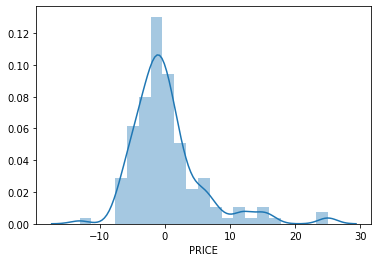

In [0]:
import seaborn as sns

sns.distplot(y_test - prediction_lasso)

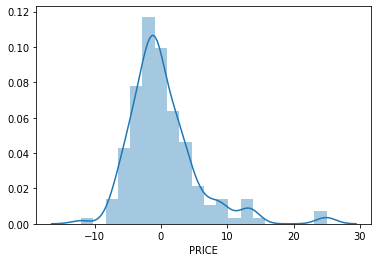

In [0]:
sns.distplot(y_test - prediction_ridge)